In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from datetime import datetime
import os
import itertools
import io
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
# Load the TensorBoard notebook extension.
%load_ext tensorboard
import seaborn as sns

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
keras.__version__

'2.4.0'

In [4]:
path = "C:/Users/suhas/Documents/Mini Project/Leaves/"
test = "C:/Users/suhas/Documents/Mini Project/Leaves/Test"

In [5]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [6]:
IMAGE_SIZE = 100
num_classes = 47 #changed from 32
epochs = 100
initializer = 'he_normal'

In [7]:
def label(img_name):
    num = img_name.split('_')[1]
    #print(num)
    if num == 'pubescent bamboo':
        return 0 
    elif num == 'chinese horse chestnut':
        return 1 
    elif num == 'anhui barberry':
        return 2 
    elif num == 'chinese redbud':
        return 3
    elif num == 'true indigo':
        return 4
    elif num == 'japanese maple':
        return 5 
    elif num == 'nanmu':
        return 6 
    elif num == 'castor aralia':
        return 7 
    elif num == 'chinese cinnamon':
        return 8 
    elif num == 'goldenrain tree':
        return 9 
    elif num == 'big fruited holly':
        return 10 
    elif num == 'japanese chestwood':
        return 11 
    elif num == 'wintersweet':
        return 12 
    elif num == 'camphor tree':
        return 13
    elif num == 'japan arrowwood':
        return 14
    elif num == 'sweet osmanthus':
        return 15
    elif num == 'deodar':
        return 16
    elif num == 'ginkgo':
        return 17 
    elif num == 'crape myrtle':
        return 18 
    elif num == 'oleandar':
        return 19
    elif num == 'yew plum pie':
        return 20
    elif num == 'japanese flowering cherry':
        return 21 
    elif num == 'glossy privet':
        return 22
    elif num == 'chinese toon':
        return 23
    elif num == 'peach':
        return 24
    elif num == 'ford woodlotus':
        return 25
    elif num == 'trident maple':
        return 26
    elif num == 'beales barberry':
        return 27
    elif num == 'southern magnolia':
        return 28
    elif num == 'canadian poplar':
        return 29
    elif num == 'chinese tulip tree':
        return 30
    elif num == 'tangerine':
        return 31
    elif num == 'ulmus carpinifolia':
        return 32 
    elif num == 'acer':
        return 33
    elif num == 'salix aurita':
        return 34
    elif num == 'quercus':
        return 35 
    elif num == 'alnus incana':
        return 36 
    elif num == 'betula pubescens':
        return 37 
    elif num == 'salix alba sericea':
        return 38 
    elif num == 'populus tremula':
        return 39 
    elif num == 'ulmus glabra':
        return 40 
    elif num == 'sorbus aucuparia':
        return 41 
    elif num == 'salix sinerea':
        return 42 
    elif num == 'populus':
        return 43
    elif num == 'tilia':
        return 44
    elif num == 'sorbus intermedia':
        return 45
    elif num == 'fagus silvatica':
        return 46

# Creating Dataset

In [8]:
def create_dataset(path):
    data = []
    for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                '''imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)'''

                # Resize
                new = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                #Adding third dimension to shape
                data.append([new, leaf])
    return data

In [9]:
data = create_dataset(path)

In [10]:
X = np.array([d[0] for d in data])
len(X)

3032

In [11]:
X = np.divide(X, 255)
len(X)
X.shape

(3032, 100, 100, 3)

In [12]:
y = np.array([d[1] for d in data])
len(y)

3032

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 1, stratify=y_train)

In [14]:
class_names = list(range(47)) #changed from 32
class_names

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

# CNN

In [15]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    #layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    #layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='valid', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    #layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
X_train.shape

(1705, 100, 100, 3)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        5

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [20]:
# Start TensorBoard.
#%tensorboard --logdir logs/image

history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_val, y_val), use_multiprocessing = True, batch_size=64, callbacks=[callback])

Epoch 1/100
27/27 [==============================] - 1s 39ms/step - loss: 3.5663 - accuracy: 0.3449 - val_loss: 3.8298 - val_accuracy: 0.0351
Epoch 2/100
27/27 [==============================] - 0s 17ms/step - loss: 3.3257 - accuracy: 0.5947 - val_loss: 3.7669 - val_accuracy: 0.1318
Epoch 3/100
27/27 [==============================] - 0s 17ms/step - loss: 3.1536 - accuracy: 0.7718 - val_loss: 3.7080 - val_accuracy: 0.2460
Epoch 4/100
27/27 [==============================] - 0s 17ms/step - loss: 3.0343 - accuracy: 0.8798 - val_loss: 3.6667 - val_accuracy: 0.2988
Epoch 5/100
27/27 [==============================] - 0s 17ms/step - loss: 2.9908 - accuracy: 0.9120 - val_loss: 3.6924 - val_accuracy: 0.2408
Epoch 6/100
27/27 [==============================] - 0s 17ms/step - loss: 2.9605 - accuracy: 0.9390 - val_loss: 3.6307 - val_accuracy: 0.3937
Epoch 7/100
27/27 [==============================] - 0s 16ms/step - loss: 2.9270 - accuracy: 0.9724 - val_loss: 3.6096 - val_accuracy: 0.3726
Epoch 

27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9763 - val_accuracy: 0.9174
Epoch 59/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9762 - val_accuracy: 0.9209
Epoch 60/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9761 - val_accuracy: 0.9192
Epoch 61/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9763 - val_accuracy: 0.9192
Epoch 62/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9762 - val_accuracy: 0.9174
Epoch 63/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9761 - val_accuracy: 0.9174
Epoch 64/100
27/27 [==============================] - 0s 16ms/step - loss: 2.8861 - accuracy: 1.0000 - val_loss: 2.9758 - val_accuracy: 0.9192
Epoch 65/100

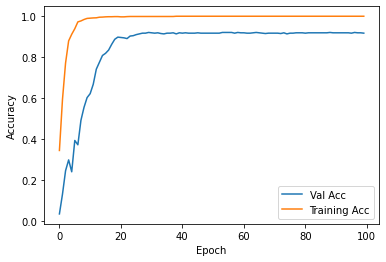

In [21]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['accuracy'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 5ms/step - loss: 2.9567 - accuracy: 0.9420


[2.9566972255706787, 0.9419525265693665]

In [24]:
tf.keras.models.save_model(model, 'C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model\assets


In [25]:
max(history.history['val_accuracy'])

0.9209138751029968

## Classification Report

In [50]:
y_pred = model.predict(X_test)

In [51]:
pred = list()

In [52]:
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.94      0.94      0.94        16
           2       0.76      0.81      0.79        16
           3       1.00      0.94      0.97        18
           4       0.85      0.94      0.89        18
           5       1.00      1.00      1.00        14
           6       0.88      0.93      0.90        15
           7       1.00      1.00      1.00        13
           8       0.85      0.79      0.81        14
           9       0.83      1.00      0.91        15
          10       0.92      1.00      0.96        12
          11       0.89      1.00      0.94        16
          12       0.93      1.00      0.96        13
          13       1.00      0.94      0.97        16
          14       0.93      0.93      0.93        15
          15       1.00      0.93      0.96        14
          16       0.95      1.00      0.97        19
          17       1.00    

## Confusion Matrix with Seaborn (On Test Data)

In [110]:
pred = model.predict(X_test)

In [111]:
conf = confusion_matrix(y_test, np.argmax(pred, axis = 1))

<AxesSubplot:>

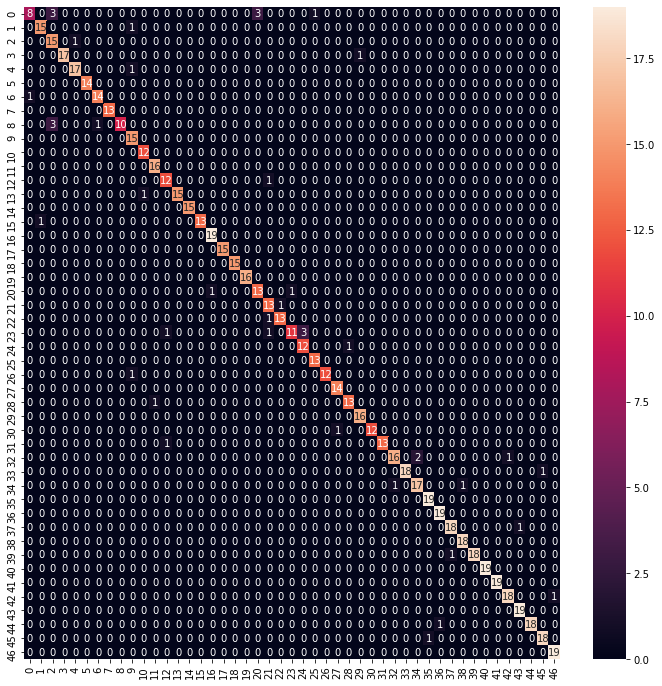

In [112]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf, annot=True)

## Confusion Matrix (On Validation Data)

In [113]:
vald = model.predict(X_val)


In [114]:
conf_val = confusion_matrix(y_val, np.argmax(vald, axis = 1))

<AxesSubplot:>

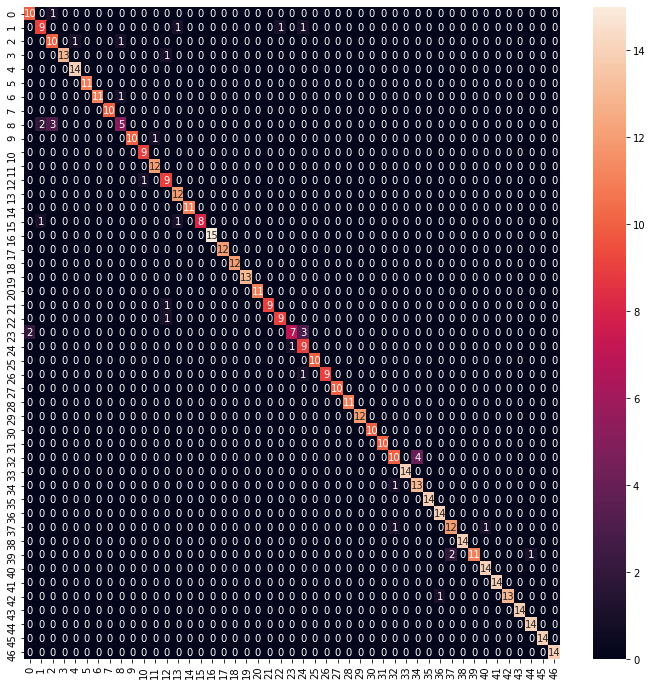

In [115]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_val, annot=True)

In [69]:
img = cv2.imread(test)


In [70]:
new = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

In [71]:
test = "C:\\Users\\suhas\\Documents\\Mini Project\\Leaves\\leaf_crape myrtle\\2487.jpg"

In [72]:
new.shape = (1, ) + new.shape

In [73]:
model.predict(new)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)